In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("train.csv")


In [4]:
# Drop irrelevant columns
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Fill missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Encode categorical features
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
df["Sex"] = le_sex.fit_transform(df["Sex"])
df["Embarked"] = le_embarked.fit_transform(df["Embarked"])

# Separate features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]


C:\Users\rites\AppData\Local\Temp\ipykernel_3336\3940597544.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\rites\AppData\Local\Temp\ipykernel_3336\3940597544.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [5]:
params = {
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}
dtree = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(dtree, params, cv=5, scoring='accuracy')
grid.fit(X, y)
best_dtree = grid.best_estimator_


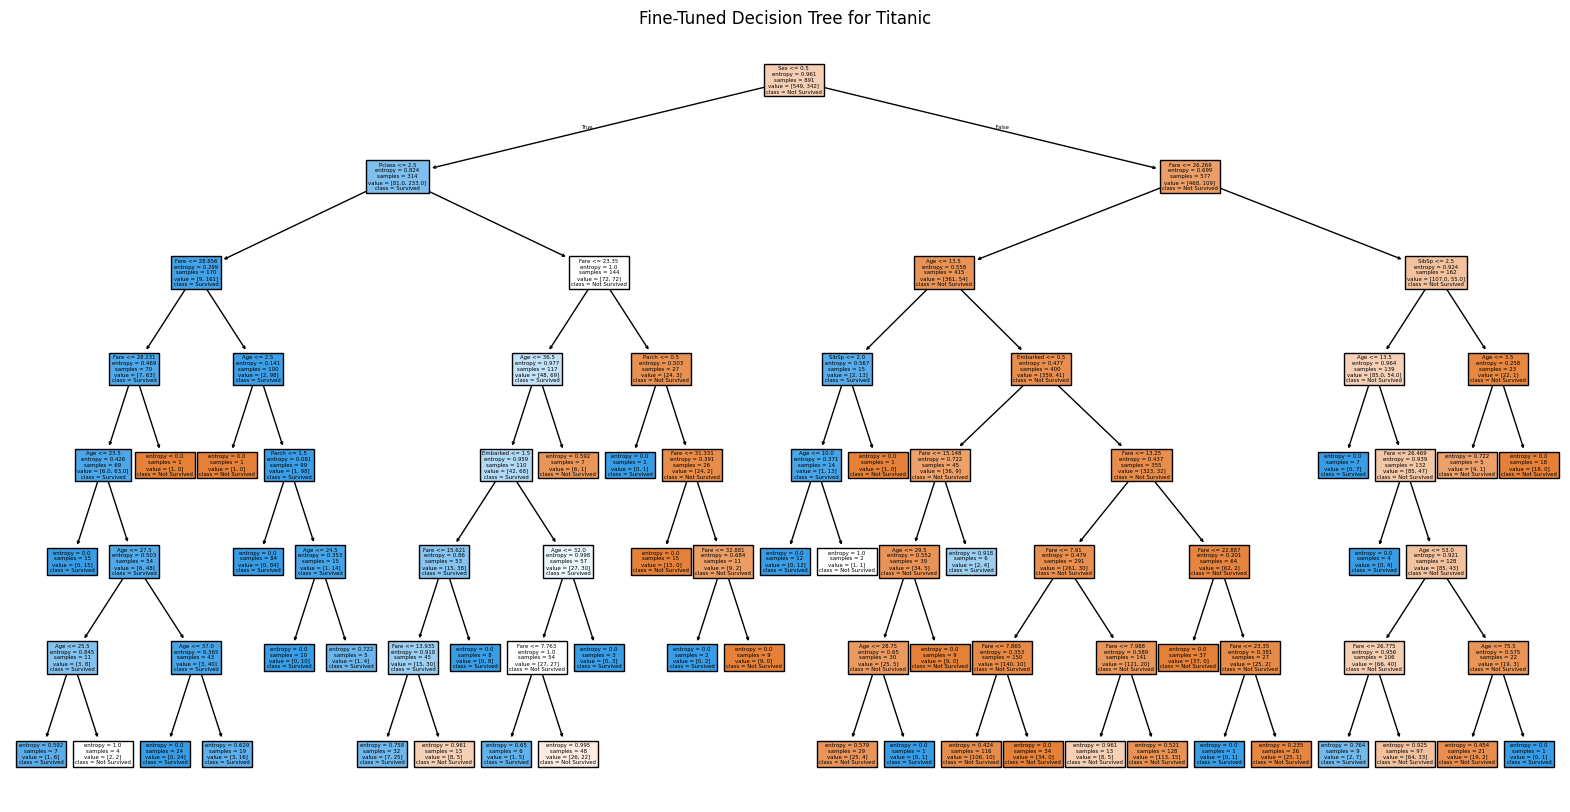

In [6]:
plt.figure(figsize=(20, 10))
plot_tree(best_dtree, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.title("Fine-Tuned Decision Tree for Titanic")
plt.show()


In [7]:
dtree_scores = cross_val_score(best_dtree, X, y, cv=5, scoring="accuracy")
print(f"Decision Tree Accuracy (5-Fold CV): {dtree_scores.mean():.4f}")


Decision Tree Accuracy (5-Fold CV): 0.8193


In [8]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring="accuracy")
print(f"Random Forest Accuracy (5-Fold CV): {rf_scores.mean():.4f}")


Random Forest Accuracy (5-Fold CV): 0.8216


## Conclusion

- Decision Tree Accuracy: 0.8193 = 81.93%
- Random Forest Accuracy: 0.8216 = 82.16%

Random Forest slightly outperformed the Decision Tree due to its ensemble nature, reducing overfitting. Decision Trees are easier to interpret, while Random Forests offer better generalization.
